# Topic Modeling Menggunakan Latent Dirchlect Allocation 
## (Part 1): Pre-processing Data dengan Python
Ref: [Klik Me!](https://medium.com/@listari.tari/topic-modelling-menggunakan-latent-dirchlect-allocation-part-1-pre-processing-data-dengan-python-87bf5c580923)

- **“Kata”** dianggap sebagai unit dasar dari data diskrit dalam dokumen, didefinisikan sebagai item dari kosa kata yang diberi indeks untuk setiap kata unik pada dokumen. 
- **“Dokumen”** adalah susunan N katakata. 
- **"Corpus"** adalah kumpulan M dokumen.
- **"Corpora"** merupakan bentuk jamak dari corpus.
- **“Topic”** adalah distribusi dari beberapa kosakata yang bersifat tetap. 
 
Secara sederhana, **setiap dokumen dalam corpus** mengandung proporsi tersendiri dari topik-topik yang dibahas sesuai kata-kata yang terkandung di dalamnya. Topic modeling telah menjadi bidang yang diminati oleh sebagian besar penulis dari bidang Text Mining, Natural Language Processing, dan Machine Learning (Verma & Gahier 2015).

In [313]:
# import nltk
# nltk.download('stopwords')

In [314]:
import pandas as pd
import numpy as np
import re, string, unicodedata  #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata
from nltk.corpus import stopwords
import json
import matplotlib.pyplot as plt

# sastrawi - stemming library (bahasa indonesia)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# tqdm - progress bar library
from tqdm import tqdm

In [315]:
df = pd.read_csv("../datasets/target_user_comment.csv")

In [316]:
df_comment = df['comment']
df_comment

0      Izin bertnya apakah studi idenpenden mitra pro...
1                                 Dapat uang saku gaksih
2              @rwrt1.0 kelas full english kak batch ini
3                          Saya, saya bang ga lolos msib
4                                                     🔥🔥
                             ...                        
577    @spontanahuy tanggal 15 terakhirnya 🙏🏻 ada bbr...
578    @spontanahuy ga ush berharap lgi udh tgl segin...
579                  @spontanahuy asliii butuh kepastian
580    Siapa saja yg lolos utk ikut survei diinfokan ...
581    Jadi min untuk pengumuman magang merdeka nya u...
Name: comment, Length: 582, dtype: object

## Data Pre-processing

In [317]:
replacements = {}

# Read in the replacements from the file
with open('combined_slang_words.txt', 'r') as f:
    replacements = json.load(f)

In [318]:
stop_words = set(stopwords.words('indonesian'))
stop_words.update([
    'min', 'ga', 'gak', 'iya', 'ya', 'sih', 'gk', 'kak', 'bang', 'pak', 'sir', 'bro', 'sob', 'sdr','mbak', 'mba', 'kakak', 'kakaknya', 'kakakku', 'nya', 'bro_swryz', 'swryz', 'adrian', 'mas', 
])

In [319]:
# remove sentence which contains only one word
def remove_sentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
        
    return str

# change bahasa slang to bahasa
def change_slang(str):
    words = str.split()
    new_words = []
    for word in words:
        if word in replacements:
            new_words.append(replacements[word])
        else:
            new_words.append(word)
    return " ".join(new_words)

# remove stopwords
def remove_stopword(str):    
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    return ' '.join(filtered_sentence)#remove sentence which contains only one word


# cleaning text
def cleaning(str):
    # Remove mentions using regex
    str = re.sub(r'@\w+', '', str)
    
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)

    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    
    #remove digit from string
    # # str = re.sub("\S*\d\S*", "", str).strip()
    str = re.sub("\d+", "", str)
    
    # #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    
    # #to lowercase
    str = str.lower()
    
    # #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    
    # menjadikan ke bentuk kata dasar
    stemmer = StemmerFactory().create_stemmer()
    str = stemmer.stem(str)
    
    # make it to list
    # str = str.split()
    
    return str

# preprocessing
def preprocessing(str):
    str = remove_sentence(str)
    str = change_slang(str)
    str = cleaning(str)
    str = remove_stopword(str)
    
    return str

# clean with progress bar
def clean_with_loop(df):
    df_clean = []
    progress = tqdm(df)
    for item in progress:
        progress.set_description("Cleaning")
        df_clean.append(preprocessing(item))
        
    return df_clean

<>:45: DeprecationWarning: invalid escape sequence \d
<>:54: DeprecationWarning: invalid escape sequence \s
<>:45: DeprecationWarning: invalid escape sequence \d
<>:54: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_32361/690602171.py:45: DeprecationWarning: invalid escape sequence \d
  str = re.sub("\d+", "", str)
/tmp/ipykernel_32361/690602171.py:54: DeprecationWarning: invalid escape sequence \s
  str = re.sub('[\s]+', ' ', str)


In [320]:
# test preprocessing
sentences = [
    "@bchanh18_ mas kelanjutan nya gmna, di web nya Masi aktif? Tp ga ikut kegiatan magang? Nanti kalo pendanaan masuk gtu? Saya soalnya sama nih",
    "kerja daftar banyak usaha ikutin interview follow up @asu terima karna daftar terima dikabarin daftar msib harap apply kerja jarang abar daftar lolos bukan dukung nyata lebih adaptasi ambil ajar batch"
]

hasil = clean_with_loop(sentences)
for item in hasil:
    print(item)

Cleaning: 100%|██████████| 2/2 [00:00<00:00, 40.52it/s]

gmna web aktif tp giat magang dana masuk gtu
kerja daftar usaha ikutin interview follow up terima daftar terima dikabarin daftar msib harap apply kerja jarang abar daftar lolos dukung nyata adaptasi ambil ajar batch


In [321]:
# do preprocessing on comment data
clean_comment = clean_with_loop(df_comment)

Cleaning: 100%|██████████| 582/582 [00:11<00:00, 50.06it/s]


In [322]:
df_clean = pd.DataFrame(clean_comment, columns=['comment'])
df_clean

,comment
0,izin bertnya studi idenpenden mitra programing...
1,uang saku gaksih
2,kelas full english batch
3,lolos msib
4,
...,...
577,tanggal bbrpa usaha nerima tunggu email ditelp
578,ush harap udh tanggal gin wkwk
579,asliii butuh
580,lolos survei info dimna


## (Part 2): Modeling using LDA

In [323]:
import gensim
from gensim.models import Phrases
from gensim import corpora, models


In [324]:
text_list = [i.split() for i in df_clean['comment']]

In [325]:
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [326]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(219 unique tokens: ['izin', 'mitra', 'studi', 'saku', 'uang']...)


In [327]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.
'''

print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

582
[(27, 1), (28, 1), (29, 1)]


In [328]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [329]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, texts=text_list, start=start, limit=limit, step=step)

100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


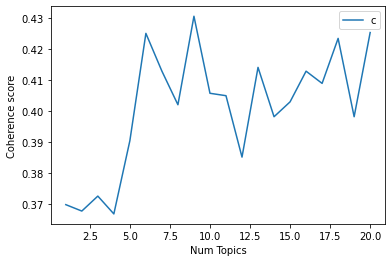

In [330]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [331]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.369893
Num Topics = 2  has Coherence Value of 0.367832
Num Topics = 3  has Coherence Value of 0.372641
Num Topics = 4  has Coherence Value of 0.366911
Num Topics = 5  has Coherence Value of 0.390456
Num Topics = 6  has Coherence Value of 0.424965
Num Topics = 7  has Coherence Value of 0.412818
Num Topics = 8  has Coherence Value of 0.402017
Num Topics = 9  has Coherence Value of 0.430471
Num Topics = 10  has Coherence Value of 0.4057
Num Topics = 11  has Coherence Value of 0.404925
Num Topics = 12  has Coherence Value of 0.385181
Num Topics = 13  has Coherence Value of 0.414026
Num Topics = 14  has Coherence Value of 0.39816
Num Topics = 15  has Coherence Value of 0.402939
Num Topics = 16  has Coherence Value of 0.412808
Num Topics = 17  has Coherence Value of 0.408882
Num Topics = 18  has Coherence Value of 0.423351
Num Topics = 19  has Coherence Value of 0.398161
Num Topics = 20  has Coherence Value of 0.425229


### Building the LDA Model

In [332]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=3) 
# num topic menyesuaikan hasil dari coherence value paling tinggi

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.039*"proses" + 0.034*"terima" + 0.024*"kampus_merdeka" + 0.024*"berkas" + 0.015*"seleksi" + 0.014*"wkwk" + 0.013*"tanggal" + 0.013*"kampus" + 0.012*"status" + 0.012*"informasi"
Topic: 1 Word: 0.024*"offering" + 0.021*"kasih" + 0.020*"moga" + 0.019*"proses" + 0.018*"mitra" + 0.017*"lolos" + 0.017*"semangat" + 0.017*"udh" + 0.016*"kabar" + 0.015*"msib"
Topic: 2 Word: 0.030*"msib" + 0.027*"mitra" + 0.022*"lolos" + 0.020*"salah" + 0.018*"dokumen" + 0.017*"mahasiswa" + 0.014*"daftar" + 0.014*"status" + 0.013*"proses" + 0.013*"banding"


### Save top words per topic

In [333]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("output/top_words.csv")

In [334]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'output/lda-gensim.html')

/home/sugab/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.035410  0.038688       1        1  35.961413
2     -0.020288 -0.046388       2        1  34.187754
1      0.055698  0.007699       3        1  29.850833, topic_info=               Term       Freq      Total Category  logprob  loglift
161        offering   8.000000   8.000000  Default  30.0000  30.0000
176  kampus_merdeka   9.000000   9.000000  Default  29.0000  29.0000
179            moga   7.000000   7.000000  Default  28.0000  28.0000
102         dokumen   7.000000   7.000000  Default  27.0000  27.0000
18           terima  18.000000  18.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
129           salah   2.911958  12.975838   Topic3  -4.5868  -0.2853
4              uang   2.246744   5.054671   Topic3  -4.8462   0.3981
14             info   2.217002   6.413148   Topic3  -4.8595   0.14

### Apply LDA Model for Labeling

In [335]:
# Interpret the topics
for idx, topic in model.print_topics(num_topics=10):
    topic_words = topic.split("+")
    top_words = [re.findall(r'"([^"]*)"', word)[0] for word in topic_words]
    print(f'Topic {idx}: {" ".join(top_words)}')

Topic 0: proses terima kampus_merdeka berkas seleksi wkwk tanggal kampus status informasi
Topic 1: offering kasih moga proses mitra lolos semangat udh kabar msib
Topic 2: msib mitra lolos salah dokumen mahasiswa daftar status proses banding


In [336]:
df_with_topic = df[['comment']]

In [337]:
df_with_topic['clean'] = df_clean['comment']

/tmp/ipykernel_32361/2701166537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_topic['clean'] = df_clean['comment']


In [338]:
# Label the data based on the topics
topic_probs = [model.get_document_topics(doc) for doc in doc_term_matrix]
df_with_topic['topic'] = [max(probs, key=lambda x:x[1])[0] for probs in topic_probs]

/tmp/ipykernel_32361/3644471848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_topic['topic'] = [max(probs, key=lambda x:x[1])[0] for probs in topic_probs]


In [339]:
df_with_topic

,comment,clean,topic
0,Izin bertnya apakah studi idenpenden mitra pro...,izin bertnya studi idenpenden mitra programing...,2
1,Dapat uang saku gaksih,uang saku gaksih,1
2,@rwrt1.0 kelas full english kak batch ini,kelas full english batch,0
3,"Saya, saya bang ga lolos msib",lolos msib,2
4,🔥🔥,,0
...,...,...,...
577,@spontanahuy tanggal 15 terakhirnya 🙏🏻 ada bbr...,tanggal bbrpa usaha nerima tunggu email ditelp,1
578,@spontanahuy ga ush berharap lgi udh tgl segin...,ush harap udh tanggal gin wkwk,0
579,@spontanahuy asliii butuh kepastian,asliii butuh,2
580,Siapa saja yg lolos utk ikut survei diinfokan ...,lolos survei info dimna,2


In [340]:
df_with_topic.to_csv('output/df_with_topic.csv')